In [8]:
from astropy.cosmology import FlatLambdaCDM
import numpy as np
from scipy.integrate import quad
import emcee

In [2]:
data = np.loadtxt('data/C11.csv', delimiter=',')

In [3]:
z = data[:, 0]
muobs = data[:, 1]
sigma = data[:, 2]

In [21]:
def loglike(theta):
    h0, Om = theta
    cosmo = FlatLambdaCDM(H0 = h0 * 100, Om0 = Om)
    dl = cosmo.luminosity_distance(z)
    uth = 5 * np.log10(dl.value) + 25
    A = ((uth - muobs) ** 2 / sigma ** 2).sum()
    B = ((uth - muobs) / sigma ** 2).sum()
    C = (1 / sigma ** 2).sum()
    return - (A - B / C ** 2)

In [22]:
def lorprior(theta):
    h0, Om = theta
    if 0 < h0 < 1 and 0 < Om < 1:
        return loglike(theta)
    return - np.inf

In [ ]:
ndim, nwalkers = 2, 10
pos = [[0.7, 0.3] + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]
sampler = emcee.EnsembleSampler(nwalkers, ndim, lorprior, threads = 16)
chains = sampler.run_mcmc(pos, 3000)

In [26]:
samples = sampler.chain[:, 50:, :].reshape((-1, ndim))

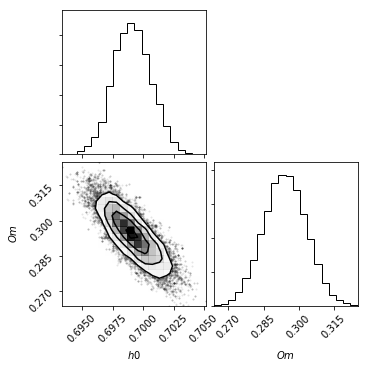

In [28]:
import corner
fig = corner.corner(samples, labels=["$h0$", "$Om$"])

In [32]:
lorprior((0.7, 0.29))

-1067.4820467343743

In [34]:
lorprior((0.65, 0.38))

-2002.9432901246344